#  <font color='Blue' align='right'>1D Stefan Problem </font> 

## <font color='olive'> Introduction </font>

In general, due to temperature variance matter is subjected to phase chage. Therefore, a boundary is developed seperating the two phases of matter. This boundary act as an interface. The position of interface is determined as function of time. Stefan problem genrally used to determine the temperature distribution in phase change models.

In this problem, the vapor and liquid are taken in a free slip tube as shown in figure. <img src="./1d stefan problem.jpg"style="width: 300px,right;"/> Temprature of the wall $T_{wall}$ is set to constant which is greater than saturation temperature $T_{sat}$. $T_{sat}$ is the inital temperature of the liquid phase.
At time t=0, the vapour and liquid are constant. at time $t>0$, the liquid will boil at the interface,and due to heat flux and volume expansion the interface will move towards the tube outlet.

In this notebook, The results of the numerical solutions are compared with the theoretical solution solutions and are verified.

We start solving by importing library functions

In [54]:
from matplotlib import pyplot, cm
from math import * 
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

## <font color='olive'> Theoritical Solution </font>

The intrace postion and Temperature distribution is calculated from the theoritical formula.
$$X_I = 2 \chi \sqrt{\alpha_V*t}           (1)$$

$$T = T_{wall} + \frac{T_{wall}-T_{sat}}{erf(\chi)}erf (\frac{\chi}{2\sqrt{\alpha_V*t}})$$

$\chi$ is calcuated from transcedental equation
$$\chi \exp{(\chi^2)} erf(\chi) = \frac{C_{pv} (T_{wall}-T_{sat})}{\sqrt{\pi L}}$$
$L$ = latent heat of the vaporization, $C_{pv}$=The specific heat capacity of the vapor,$\alpha_v$ = thermal diffusitivity of the vapour,

## <font color='olive'> Numerical Solution </font>

The numerical solution for 1D Stefan is calculated by discretizing the goverining equation $$\frac{\partial T}{\partial t} = \frac{\partial }{\partial x}( \alpha\frac{\partial T}{\partial x}) $$;

The heat equation is modified to in this problem to avoid the jumps in temperature distribution.

Initial parameters are set:

In [55]:
t = 0.1                           #time
alpha1 = 2.06*10**-5              #thermal diffusitivity of vapour
alpha2 = 0.17*10**-6              #thermal diffusitivity of water
Cp = 2030                         #The specific heat capacity of the vapor
Tw = 383.15                       #wall temperature
Tsat = 373.15                     #saturation temperature
L = 2.26*10**6                    #Latent Heat
chi = 0.0669161                   #value calculated from eqn 3

set the initial conditions

In [56]:
#Numerical Solution
l = 0.001                                #Length of the Domain
nx = 100                                 
dx = l/nx
dt = (dx**2*0.05)/(max(alpha1,alpha2))
nt = int(t/dt)                           #Time steps

In the first step we find the position of the interface using the $eqn (1)$. from the interface postion we calculate the distance to the grid point. The governing equation's discretization is dependent on the interface distance from the point. if $(\phi)$ $\geq$ 0 we discretize the $eqn (4)$ in vapor phase or $(\phi)$ $\leq$ 0, diffusion equation of water is discretized.,

The $eqn(1)$ is discretized by considering one dimensional case as shown in fig:  <img src="./1d stefan problem.jpg"style="width: 300px,right;"/>  


In [47]:
#Solving transcedental equation to find out the interface distance

phi = numpy.zeros((nx,1),dtype=float)
T = numpy.zeros((nx,1),dtype=float) 
T[:] = Tsat 

tol = 0.1

for tstep in range(1,200000):
    XI = 2*chi*(sqrt(alpha1*tstep*dt)) #Calculated the interface position
    
    #Distance between the interface and the point
    for i in range(0,nx):
        phi[i] = XI - (i*dx) 
    
    Told = T.copy()

    for i in range(1,nx-1):
        
        if(phi[i]*phi[i+1] <= 0.):
        
            if((abs(phi[i])/(abs(phi[i])+abs(phi[i+1])))>tol):
            
                th = (abs(phi[i])/(abs(phi[i])+abs(phi[i+1])))
                Txp = (Tsat-Told[i])/th + Told[i]
                axm = alpha1
                axp = (alpha1+(alpha1*th+alpha2*(1.-th)))*0.5
                Txm = Told[i-1]
            
            else:
            
                th = (abs(phi[i-1])/(abs(phi[i-1])+abs(phi[i+1])))
                Txp = (Tsat-Told[i-1])/th + Told[i]
                axm = alpha1
                axp = (alpha1+(alpha1*th+alpha2*(1.-th)))*0.5
                Txm = Told[i-1]
            
    
        elif(phi[i]*phi[i-1] <= 0.):
        
            if((abs(phi[i])/(abs(phi[i])+abs(phi[i-1])))>tol):
            
                th = (abs(phi[i])/(abs(phi[i])+abs(phi[i-1])))
                Txm = (Told[i]-Tsat)/th + Told[i]
                axp = alpha2
                axm = (alpha2+(alpha2*th+alpha1*(1.-th)))*0.5
                Txp = Told[i+1]
            
            else:
            
                th = (abs(phi[i+1])/(abs(phi[i+1])+abs(phi[i-1])))
                Txm = (Told[i+1]-Tsat)/th + Told[i]
                axp = alpha2
                axm = (alpha2+(alpha2*th+alpha1*(1.-th)))*0.5
                Txp = Told[i+1]
    
        else:
            
            Txm = Told[i-1]
            Txp = Told[i+1]
            
            if(phi[i]>=0.):
                axm = alpha1
                axp = alpha1
            
            else:
                axm = alpha2
                axp = alpha2
                
        
        T[i] = Told[i] + dt*(axp*(Txp-Told[i])/dx - axm*(Told[i]-Txm)/dx)/dx          
            
            
    #Boundary Conditions
    T[0] = Tw
    T[-1] = Tsat
    
    T_res = sum((T-Told)**2)/nx
    
    
    
    if(tstep == 10):
        T_1 = T.copy()
    if(tstep == 100):
        T_2 = T.copy()
     
    if(tstep == 1000):
        T_3 = T.copy()
        
    if(tstep == 10000):
        T_4 = T.copy()
           
    if(tstep == 100000):
        T_5 = T.copy()
        

KeyboardInterrupt: 

(0.0, 0.00025)

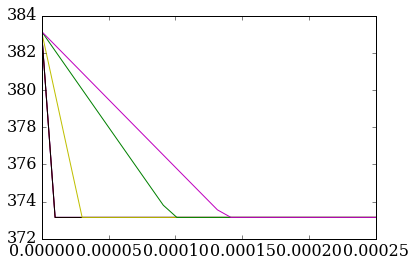

In [25]:
pyplot.plot(numpy.linspace(0,l,nx),T_1,'b')
pyplot.plot(numpy.linspace(0,l,nx),T_2,'-r')
pyplot.plot(numpy.linspace(0,l,nx),T_3,'k')
pyplot.plot(numpy.linspace(0,l,nx),T_4,'y')
pyplot.plot(numpy.linspace(0,l,nx),T_5,'g')
pyplot.plot(numpy.linspace(0,l,nx),T,'m')
pyplot.xlim([0.,0.00025])